## Importing important libraries for analysis
In this section, the import python libraries are loaded and loading the dataset using pandas

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv("fake_job_postings.csv")

## Data Wrangling
Here, insights are drawn by checking a glimpse of the dataset. Then, the little information like the datatypes, number of null values and the number of data present are showed in this category.

In [49]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [51]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
null = df.isnull().sum()

In [53]:
null

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<AxesSubplot:>

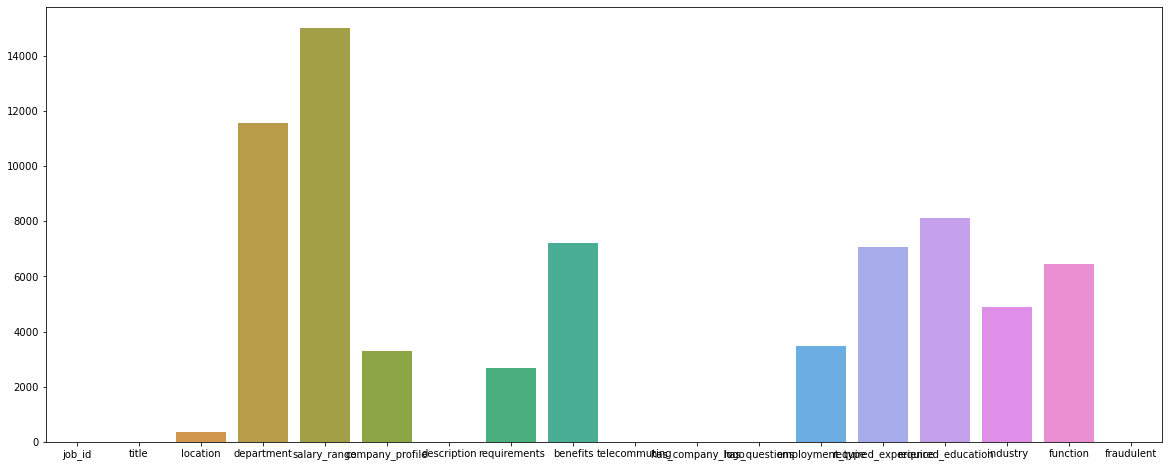

In [54]:
plt.figure(figsize= (20,8))
sns.barplot(x= null.index, y= null)

The above diagram show the columns with null values and how many null values are present.

## Cleaning the Dataset.

Moving forward, the columns with much missing values are dropped and other important values are replaced with the mode of the column

In [55]:
df.drop(['salary_range','company_profile', 'requirements','benefits'],inplace = True, axis= 1)

In [56]:
df.head()

,job_id,title,location,department,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,"Our client, located in Houston, is actively se...",0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [57]:
df.employment_type.fillna('Full-Time', inplace= True)

In [58]:
df.required_education.fillna("Bachelor's Degree", inplace =True)

In [59]:
df.required_experience.fillna('Mid-Senior level', inplace = True)

In [60]:
df.drop('department',axis= 1, inplace= True)

In [61]:
df.dropna(axis= 0, inplace = True)

In [62]:
df.isnull().sum()

job_id                 0
title                  0
location               0
description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10428 entries, 1 to 17879
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               10428 non-null  int64 
 1   title                10428 non-null  object
 2   location             10428 non-null  object
 3   description          10428 non-null  object
 4   telecommuting        10428 non-null  int64 
 5   has_company_logo     10428 non-null  int64 
 6   has_questions        10428 non-null  int64 
 7   employment_type      10428 non-null  object
 8   required_experience  10428 non-null  object
 9   required_education   10428 non-null  object
 10  industry             10428 non-null  object
 11  function             10428 non-null  object
 12  fraudulent           10428 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [64]:
fake_industry = df.industry.value_counts()

In [65]:
fake_industry_10 = fake_industry.head(10)

<AxesSubplot:ylabel='industry'>

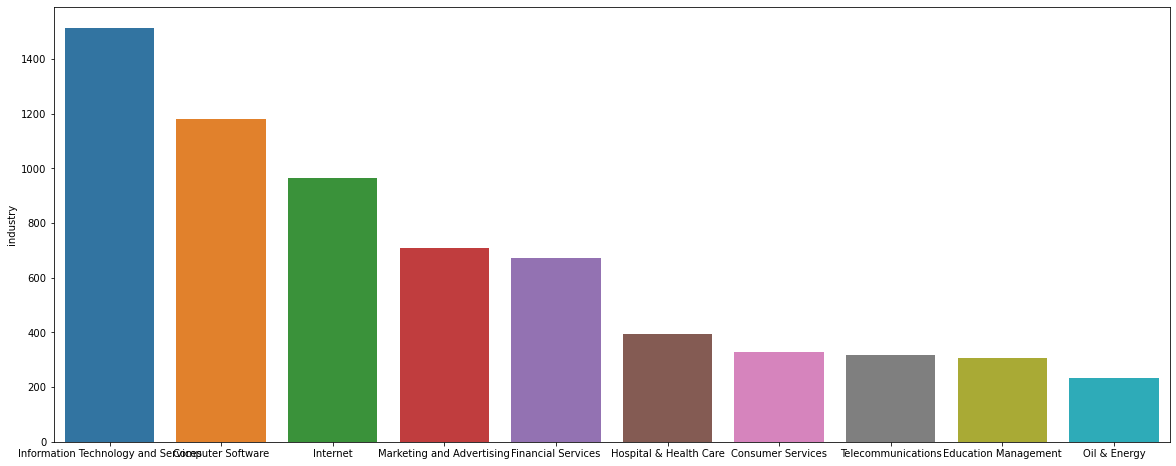

In [66]:
plt.figure(figsize=(20,8))
sns.barplot(x= fake_industry_10.index, y = fake_industry_10)

## Insights Drawn.
From the dataset, the industries with the highest fake jobs can be gotten. Also the top 10 industries with fake jobs are plotted on a bar plot as shown above.